# Analisis del metadata de las actas de TREP

In [1]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

sns.set(color_codes=True)

In [2]:
%ls

 509961.jpg                                       main.py
 509991.jpg                                       meta-analysis.ipynb
 747471.jpg                                       metadata_handler.ipynb
 all_metadata.csv                                 outputs/
'archivos excel descargados cada hora TREP.zip'   outputs_c/
 assets/                                          outputs.zip
 generic_image_name.jpg                           README.md
 logs/                                            TREP/


## Loading the data

In [4]:
# Obtain the csv files paths

files = glob.glob("./outputs_c/*.csv")


print(f"How many files? {len(files)}")

How many files? 1114


In [5]:
# Load the csv files as a list of dataframes

def load_csv_files(list_of_files):
    """
    Return a list of dataframes
    """
    list_of_df = []
    for f in list_of_files:
        df = pd.DataFrame.from_csv(f)
        list_of_df.append(df)
    return list_of_df

df_lists = load_csv_files(files)

AttributeError: type object 'DataFrame' has no attribute 'from_csv'

Obtain the column sizes for each dataframe

In [99]:
def get_column_sizes(df_lists):
    
    df_col_names = []

    for df in df_lists:
        df_col_names.append(len(df.columns))
        
    return df_col_names

df_col_names = get_column_sizes(df_lists)



Plot the distribution of column sizes

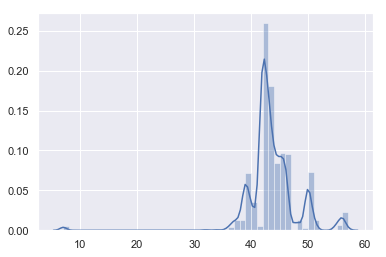

In [100]:
sns.distplot(df_col_names);

In [101]:
np.mean(df_col_names)

43.604129263913826

The average column sizes is around 43

Unique columns sizes are

In [102]:
uniques = np.unique(df_col_names)

In [104]:
uniques

array([ 7, 32, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 55, 56, 57])

In [105]:
print(len(uniques))

22


### Group sizes of Dataframes

In [106]:
list_of_dicts = []
for u in uniques:
    my_dict = {f"{u}": []}
    list_of_dicts.append(my_dict)
    
print(list_of_dicts)

[{'7': []}, {'32': []}, {'34': []}, {'36': []}, {'37': []}, {'38': []}, {'39': []}, {'40': []}, {'41': []}, {'42': []}, {'43': []}, {'44': []}, {'45': []}, {'46': []}, {'47': []}, {'48': []}, {'49': []}, {'50': []}, {'51': []}, {'55': []}, {'56': []}, {'57': []}]


In [6]:
# Create list of dicts
for df in df_lists:
    
    col_size = len(df.columns)
    #print(col_size)
    for d in list_of_dicts:
        for k, v in d.items():
            if str(col_size) == k:
                #print(col_size)
                v.append(df)
    
    
print(list_of_dicts[:5])

NameError: name 'df_lists' is not defined

In [108]:
uniques

array([ 7, 32, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 55, 56, 57])

In [109]:
count_df = len(list_of_dicts)
print(count_df)

22


In [111]:
#Create list of concat dataframes.


In [114]:
# Map the Size of the DF to his position in the list
maping = {"7": 0,
          "32":1,
          "34":2,
          "36":3,
          "37":4,
          "38":5,
          "39":6,
          "40":7,
          "41":8,
          "42":9,
          "43":10,
          "44":11,
          "45":12,
          "46":13,
          "47":14,
          "48":15,
          "49":16,
          "50":17,
          "51":18,
          "55":19,
          "56":20,
          "57":21
         }


In [115]:
# Create list of concat datafmes
all_df = []

for i, u in enumerate(uniques):
    
    all_df.append({str(u): pd.concat(list_of_dicts[i][str(u)], ignore_index=True) })

/home/stanlee321/anaconda3/envs/cv-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [116]:
# Query some df with key as the size of the dataframe.
# [7, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 55, 56, 57]

def query_df(key):
    value = maping[key]
    return all_df[value][key]
    

df_7 = query_df("7")

In [117]:
df_7.head()

,ExifOffset,Software,Orientation,DateTime,Unnamed: 5,current_download_datetime,image_src
0,2200,Microsoft Windows Photo Viewer 6.1.7600.16385,1,2019:10:21 13:12:02,b'\x1c\xea\x00\x00\x00\x08\x00\x00\x00\x00\x00...,2019-11-02 09:01:55.535612,https://trep.oep.org.bo/resul/imgActa/13271.jpg
1,2200,Microsoft Windows Photo Viewer 6.1.7600.16385,1,2019:10:21 12:34:06,b'\x1c\xea\x00\x00\x00\x08\x00\x00\x00\x00\x00...,2019-11-02 18:30:11.904508,https://trep.oep.org.bo/resul/imgActa/19161.jpg
2,2200,Microsoft Windows Photo Viewer 6.1.7600.16385,1,2019:10:21 12:58:42,b'\x1c\xea\x00\x00\x00\x08\x00\x00\x00\x00\x00...,2019-11-02 09:00:21.615778,https://trep.oep.org.bo/resul/imgActa/11211.jpg
3,2200,Microsoft Windows Photo Viewer 6.1.7600.16385,1,2019:10:21 12:22:41,b'\x1c\xea\x00\x00\x00\x08\x00\x00\x00\x00\x00...,2019-11-02 18:30:11.575578,https://trep.oep.org.bo/resul/imgActa/19151.jpg
4,2200,Microsoft Windows Photo Viewer 6.1.7600.16385,1,2019:10:21 12:21:55,b'\x1c\xea\x00\x00\x00\x08\x00\x00\x00\x00\x00...,2019-11-02 18:30:11.188464,https://trep.oep.org.bo/resul/imgActa/19141.jpg


In [118]:
uniques

array([ 7, 32, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 55, 56, 57])

In [119]:
# Obtain the column names for each dataframe

col_names = []

for u in uniques:
    
    df = query_df(str(u))
    
    col_names += list(df.columns)

In [120]:
print(len(col_names))
print(col_names[:10])

1040
['ExifOffset', 'Software', 'Orientation', 'DateTime', 'Unnamed: 5', 'current_download_datetime', 'image_src', 'ExifVersion', 'ColorSpace', 'ExifImageWidth']


In [121]:
unique_col_names = np.unique(col_names)

print(len(unique_col_names))
print(unique_col_names[:10])

73
['ApertureValue' 'BitsPerSample' 'BrightnessValue' 'ColorSpace'
 'ComponentsConfiguration' 'CompressedBitsPerPixel' 'Contrast'
 'CustomRendered' 'DateTime' 'DateTimeDigitized']


In [122]:
my_counts = []
for  unique in unique_col_names:
    counts = col_names.count(unique)
    my_counts.append({unique: counts})

print(my_counts)

[{'ApertureValue': 18}, {'BitsPerSample': 3}, {'BrightnessValue': 16}, {'ColorSpace': 21}, {'ComponentsConfiguration': 16}, {'CompressedBitsPerPixel': 2}, {'Contrast': 10}, {'CustomRendered': 6}, {'DateTime': 22}, {'DateTimeDigitized': 21}, {'DateTimeOriginal': 21}, {'DeviceSettingDescription': 2}, {'DigitalZoomRatio': 15}, {'ExifImageHeight': 21}, {'ExifImageWidth': 21}, {'ExifInteroperabilityOffset': 17}, {'ExifOffset': 22}, {'ExifVersion': 21}, {'ExposureBiasValue': 19}, {'ExposureMode': 20}, {'ExposureProgram': 20}, {'ExposureTime': 21}, {'FNumber': 21}, {'FileSource': 3}, {'Flash': 21}, {'FlashPixVersion': 18}, {'FocalLength': 21}, {'FocalLengthIn35mmFilm': 19}, {'GPSInfo': 14}, {'GainControl': 3}, {'ISOSpeedRatings': 21}, {'ImageDescription': 6}, {'ImageLength': 18}, {'ImageUniqueID': 15}, {'ImageWidth': 18}, {'LightSource': 13}, {'Make': 21}, {'MakerNote': 19}, {'MaxApertureValue': 17}, {'MeteringMode': 21}, {'Model': 21}, {'Orientation': 22}, {'ResolutionUnit': 21}, {'Saturatio

In [ ]:
# Combine all df in one dataframe


In [123]:
def create_unique_df():
    dfs = []
    for u in uniques:
        dfs.append( query_df(str(u)) )
    
    return pd.concat(dfs, ignore_index=True)

raw_df = create_unique_df()

/home/stanlee321/anaconda3/envs/cv-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [124]:
raw_df.head()

,ApertureValue,BitsPerSample,BrightnessValue,ColorSpace,ComponentsConfiguration,CompressedBitsPerPixel,Contrast,CustomRendered,DateTime,DateTimeDigitized,...,Unnamed: 32,Unnamed: 41,Unnamed: 5,UserComment,WhiteBalance,XResolution,YCbCrPositioning,YResolution,current_download_datetime,image_src
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019:10:21 13:12:02,NaN,...,NaN,NaN,b'\x1c\xea\x00\x00\x00\x08\x00\x00\x00\x00\x00...,NaN,NaN,NaN,NaN,NaN,2019-11-02 09:01:55.535612,https://trep.oep.org.bo/resul/imgActa/13271.jpg
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019:10:21 12:34:06,NaN,...,NaN,NaN,b'\x1c\xea\x00\x00\x00\x08\x00\x00\x00\x00\x00...,NaN,NaN,NaN,NaN,NaN,2019-11-02 18:30:11.904508,https://trep.oep.org.bo/resul/imgActa/19161.jpg
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019:10:21 12:58:42,NaN,...,NaN,NaN,b'\x1c\xea\x00\x00\x00\x08\x00\x00\x00\x00\x00...,NaN,NaN,NaN,NaN,NaN,2019-11-02 09:00:21.615778,https://trep.oep.org.bo/resul/imgActa/11211.jpg
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019:10:21 12:22:41,NaN,...,NaN,NaN,b'\x1c\xea\x00\x00\x00\x08\x00\x00\x00\x00\x00...,NaN,NaN,NaN,NaN,NaN,2019-11-02 18:30:11.575578,https://trep.oep.org.bo/resul/imgActa/19151.jpg
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019:10:21 12:21:55,NaN,...,NaN,NaN,b'\x1c\xea\x00\x00\x00\x08\x00\x00\x00\x00\x00...,NaN,NaN,NaN,NaN,NaN,2019-11-02 18:30:11.188464,https://trep.oep.org.bo/resul/imgActa/19141.jpg


In [125]:
raw_df.shape

(1114, 73)

In [126]:
df = raw_df.copy()

# Insert the column
# Complete the call to convert the date column
df['time'] =  pd.to_datetime(df['DateTime'],
                              format='%Y:%m:%d %H:%M:%S')


In [127]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114 entries, 0 to 1113
Data columns (total 74 columns):
ApertureValue                 859 non-null object
BitsPerSample                 34 non-null object
BrightnessValue               814 non-null object
ColorSpace                    1108 non-null float64
ComponentsConfiguration       1017 non-null object
CompressedBitsPerPixel        23 non-null object
Contrast                      176 non-null float64
CustomRendered                84 non-null float64
DateTime                      1114 non-null object
DateTimeDigitized             1108 non-null object
DateTimeOriginal              1108 non-null object
DeviceSettingDescription      2 non-null object
DigitalZoomRatio              409 non-null object
ExifImageHeight               1108 non-null float64
ExifImageWidth                1108 non-null float64
ExifInteroperabilityOffset    1015 non-null float64
ExifOffset                    1114 non-null int64
ExifVersion                   1108

In [128]:
# Sort the dataframe in descending order.
df.sort_values('time', ascending=True, inplace=True)
df.head()

,ApertureValue,BitsPerSample,BrightnessValue,ColorSpace,ComponentsConfiguration,CompressedBitsPerPixel,Contrast,CustomRendered,DateTime,DateTimeDigitized,...,Unnamed: 41,Unnamed: 5,UserComment,WhiteBalance,XResolution,YCbCrPositioning,YResolution,current_download_datetime,image_src,time
872,"(227, 100)",NaN,"(0, 100)",1.0,b'\x01\x02\x03\x00',NaN,NaN,NaN,2019:10:15 06:21:12,2019:10:15 06:21:12,...,NaN,NaN,b'ASCII\x00\x00\x00\xf0\\\x00\x00=\xd8\x00\x00...,0.0,"(72, 1)",1.0,"(72, 1)",2019-11-02 14:16:34.001939,https://trep.oep.org.bo/resul/imgActa/509991.jpg,2019-10-15 06:21:12
868,"(227, 100)",NaN,"(0, 100)",1.0,b'\x01\x02\x03\x00',NaN,NaN,NaN,2019:10:15 06:47:35,2019:10:15 06:47:35,...,NaN,NaN,b'ASCII\x00\x00\x00\xf0\\\x00\x00=\xd8\x00\x00...,0.0,"(72, 1)",1.0,"(72, 1)",2019-11-02 14:16:31.772972,https://trep.oep.org.bo/resul/imgActa/509961.jpg,2019-10-15 06:47:35
127,"(185, 100)",NaN,"(173, 100)",1.0,NaN,NaN,NaN,NaN,2019:10:19 17:47:12,2019:10:19 17:47:12,...,NaN,NaN,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,0.0,"(72, 1)",1.0,"(72, 1)",2019-11-02 17:07:28.866183,https://trep.oep.org.bo/resul/imgActa/747471.jpg,2019-10-19 17:47:12
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019:10:20 11:56:14,NaN,...,NaN,b'\x1c\xea\x00\x00\x00\x08\x00\x00\x00\x00\x00...,NaN,NaN,NaN,NaN,NaN,2019-11-02 18:15:02.811139,https://trep.oep.org.bo/resul/imgActa/24991.jpg,2019-10-20 11:56:14
780,NaN,NaN,NaN,1.0,b'\x01\x02\x03\x00',NaN,NaN,NaN,2019:10:20 13:19:45,2019:10:20 13:19:45,...,NaN,NaN,NaN,0.0,"(72, 1)",2.0,"(72, 1)",2019-11-02 17:59:21.527429,https://trep.oep.org.bo/resul/imgActa/811451.jpg,2019-10-20 13:19:45


In [129]:
df.set_index('time', inplace=True)
df.head()

,ApertureValue,BitsPerSample,BrightnessValue,ColorSpace,ComponentsConfiguration,CompressedBitsPerPixel,Contrast,CustomRendered,DateTime,DateTimeDigitized,...,Unnamed: 32,Unnamed: 41,Unnamed: 5,UserComment,WhiteBalance,XResolution,YCbCrPositioning,YResolution,current_download_datetime,image_src
time,,,,,,,,,,,,,,,,,,,,,
2019-10-15 06:21:12,"(227, 100)",NaN,"(0, 100)",1.0,b'\x01\x02\x03\x00',NaN,NaN,NaN,2019:10:15 06:21:12,2019:10:15 06:21:12,...,NaN,NaN,NaN,b'ASCII\x00\x00\x00\xf0\\\x00\x00=\xd8\x00\x00...,0.0,"(72, 1)",1.0,"(72, 1)",2019-11-02 14:16:34.001939,https://trep.oep.org.bo/resul/imgActa/509991.jpg
2019-10-15 06:47:35,"(227, 100)",NaN,"(0, 100)",1.0,b'\x01\x02\x03\x00',NaN,NaN,NaN,2019:10:15 06:47:35,2019:10:15 06:47:35,...,NaN,NaN,NaN,b'ASCII\x00\x00\x00\xf0\\\x00\x00=\xd8\x00\x00...,0.0,"(72, 1)",1.0,"(72, 1)",2019-11-02 14:16:31.772972,https://trep.oep.org.bo/resul/imgActa/509961.jpg
2019-10-19 17:47:12,"(185, 100)",NaN,"(173, 100)",1.0,NaN,NaN,NaN,NaN,2019:10:19 17:47:12,2019:10:19 17:47:12,...,NaN,NaN,NaN,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,0.0,"(72, 1)",1.0,"(72, 1)",2019-11-02 17:07:28.866183,https://trep.oep.org.bo/resul/imgActa/747471.jpg
2019-10-20 11:56:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019:10:20 11:56:14,NaN,...,NaN,NaN,b'\x1c\xea\x00\x00\x00\x08\x00\x00\x00\x00\x00...,NaN,NaN,NaN,NaN,NaN,2019-11-02 18:15:02.811139,https://trep.oep.org.bo/resul/imgActa/24991.jpg
2019-10-20 13:19:45,NaN,NaN,NaN,1.0,b'\x01\x02\x03\x00',NaN,NaN,NaN,2019:10:20 13:19:45,2019:10:20 13:19:45,...,NaN,NaN,NaN,NaN,0.0,"(72, 1)",2.0,"(72, 1)",2019-11-02 17:59:21.527429,https://trep.oep.org.bo/resul/imgActa/811451.jpg


In [138]:
import datetime


split_date = datetime.datetime(year=2019, month=10, day=20, hour=2, minute=8)
print(split_date)


df['status'] = np.where(df.index < split_date, 0, 1)



2019-10-20 02:08:00


In [139]:
df_out = df[df["status"] == 0]
df_out

,ApertureValue,BitsPerSample,BrightnessValue,ColorSpace,ComponentsConfiguration,CompressedBitsPerPixel,Contrast,CustomRendered,DateTime,DateTimeDigitized,...,Unnamed: 41,Unnamed: 5,UserComment,WhiteBalance,XResolution,YCbCrPositioning,YResolution,current_download_datetime,image_src,status
time,,,,,,,,,,,,,,,,,,,,,
2019-10-15 06:21:12,"(227, 100)",NaN,"(0, 100)",1.0,b'\x01\x02\x03\x00',NaN,NaN,NaN,2019:10:15 06:21:12,2019:10:15 06:21:12,...,NaN,NaN,b'ASCII\x00\x00\x00\xf0\\\x00\x00=\xd8\x00\x00...,0.0,"(72, 1)",1.0,"(72, 1)",2019-11-02 14:16:34.001939,https://trep.oep.org.bo/resul/imgActa/509991.jpg,0
2019-10-15 06:47:35,"(227, 100)",NaN,"(0, 100)",1.0,b'\x01\x02\x03\x00',NaN,NaN,NaN,2019:10:15 06:47:35,2019:10:15 06:47:35,...,NaN,NaN,b'ASCII\x00\x00\x00\xf0\\\x00\x00=\xd8\x00\x00...,0.0,"(72, 1)",1.0,"(72, 1)",2019-11-02 14:16:31.772972,https://trep.oep.org.bo/resul/imgActa/509961.jpg,0
2019-10-19 17:47:12,"(185, 100)",NaN,"(173, 100)",1.0,NaN,NaN,NaN,NaN,2019:10:19 17:47:12,2019:10:19 17:47:12,...,NaN,NaN,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,0.0,"(72, 1)",1.0,"(72, 1)",2019-11-02 17:07:28.866183,https://trep.oep.org.bo/resul/imgActa/747471.jpg,0


In [140]:
df_out.columns

Index(['ApertureValue', 'BitsPerSample', 'BrightnessValue', 'ColorSpace',
       'ComponentsConfiguration', 'CompressedBitsPerPixel', 'Contrast',
       'CustomRendered', 'DateTime', 'DateTimeDigitized', 'DateTimeOriginal',
       'DeviceSettingDescription', 'DigitalZoomRatio', 'ExifImageHeight',
       'ExifImageWidth', 'ExifInteroperabilityOffset', 'ExifOffset',
       'ExifVersion', 'ExposureBiasValue', 'ExposureMode', 'ExposureProgram',
       'ExposureTime', 'FNumber', 'FileSource', 'Flash', 'FlashPixVersion',
       'FocalLength', 'FocalLengthIn35mmFilm', 'GPSInfo', 'GainControl',
       'ISOSpeedRatings', 'ImageDescription', 'ImageLength', 'ImageUniqueID',
       'ImageWidth', 'LightSource', 'Make', 'MakerNote', 'MaxApertureValue',
       'MeteringMode', 'Model', 'Orientation', 'ResolutionUnit', 'Saturation',
       'SceneCaptureType', 'SceneType', 'SensingMethod', 'Sharpness',
       'ShutterSpeedValue', 'Software', 'SubjectDistanceRange', 'SubsecTime',
       'SubsecTimeDigiti

In [152]:
df_out

,ApertureValue,BitsPerSample,BrightnessValue,ColorSpace,ComponentsConfiguration,CompressedBitsPerPixel,Contrast,CustomRendered,DateTime,DateTimeDigitized,...,Unnamed: 41,Unnamed: 5,UserComment,WhiteBalance,XResolution,YCbCrPositioning,YResolution,current_download_datetime,image_src,status
time,,,,,,,,,,,,,,,,,,,,,
2019-10-15 06:21:12,"(227, 100)",NaN,"(0, 100)",1.0,b'\x01\x02\x03\x00',NaN,NaN,NaN,2019:10:15 06:21:12,2019:10:15 06:21:12,...,NaN,NaN,b'ASCII\x00\x00\x00\xf0\\\x00\x00=\xd8\x00\x00...,0.0,"(72, 1)",1.0,"(72, 1)",2019-11-02 14:16:34.001939,https://trep.oep.org.bo/resul/imgActa/509991.jpg,0
2019-10-15 06:47:35,"(227, 100)",NaN,"(0, 100)",1.0,b'\x01\x02\x03\x00',NaN,NaN,NaN,2019:10:15 06:47:35,2019:10:15 06:47:35,...,NaN,NaN,b'ASCII\x00\x00\x00\xf0\\\x00\x00=\xd8\x00\x00...,0.0,"(72, 1)",1.0,"(72, 1)",2019-11-02 14:16:31.772972,https://trep.oep.org.bo/resul/imgActa/509961.jpg,0
2019-10-19 17:47:12,"(185, 100)",NaN,"(173, 100)",1.0,NaN,NaN,NaN,NaN,2019:10:19 17:47:12,2019:10:19 17:47:12,...,NaN,NaN,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,0.0,"(72, 1)",1.0,"(72, 1)",2019-11-02 17:07:28.866183,https://trep.oep.org.bo/resul/imgActa/747471.jpg,0


In [147]:
df_out["GPSInfo"][2]

nan

In [153]:
df_out["Model"][0]

'SM-J250M'

In [154]:
df_out["Model"][1]

'SM-J250M'

In [156]:
df_out["Model"][2]

'SM-G903M'

In [ ]:
# save all df

In [157]:
df.to_csv("all_metadata.csv", sep = ",")